In [119]:
import numpy as np

def findMinWithRange(xdata,Idata,error):  

  minimum = np.argmin(Idata)
  minimumsx = minimumdx = minimum
  minimumsxvalue = minimumdxvalue = xdata[minimum]
  for i in range(len(xdata)):
    if(Idata[i]<Idata[minimum]*error):
      if(minimumsxvalue>xdata[i]):
        minimumsxvalue = xdata[i]
        minimumsx = i
      if(minimumdxvalue<xdata[i]):
        minimumdxvalue = xdata[i]
        minimumdx = i

  minimumIndex = np.array([minimumsx,minimumdx])
  
  return minimumIndex

Brewster Angle Simulated = minimum parallel
55.98370766981953
Brewster Angle Simulated = maximum perpendicular
55.98370766981953
Brewster Angle Simulated data mean
56.21943706362866
Brewster Angle Simulated data error
1.550662768105319
Refraction Index
1.4948789390512494
Refraction Index error
0.04867536875421801
Index rifr from fit
[1.56784284]
[0.05271415]
Brewster Angle from fit
[57.46949424]
[0.87339025]


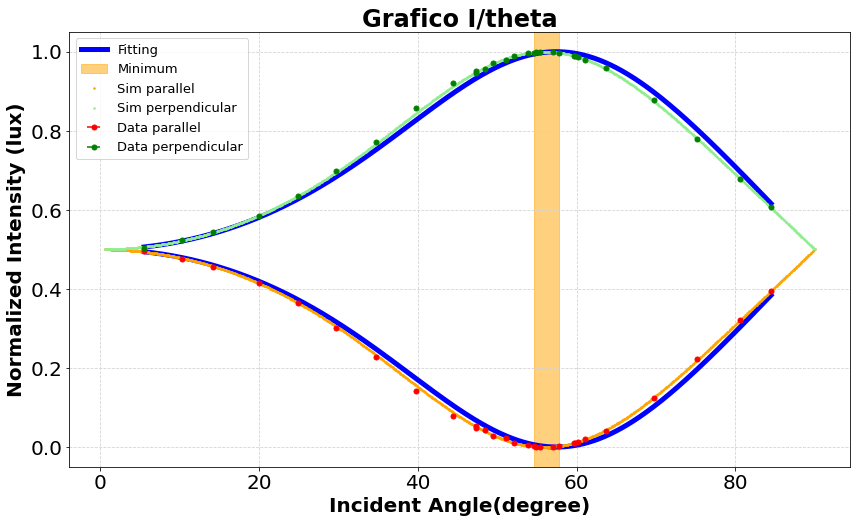

In [178]:
#SIMULATION

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

#indice di rifrazione simulato
n = 1.48

#Brewster angle simulato
theta = 56

#I0 inventata
I0 = 1

def simulation(thetai, thetat):
  return (np.tan(thetai-thetat)**2/np.tan(thetai+thetat)**2)
def simulationPerpendicular(thetai, thetat):
  return (np.sin(thetai-thetat)**2/np.sin(thetai+thetat)**2)
def fitting(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)

thetai = np.linspace(0.01,np.pi/2,1000)
thetat = np.arcsin(np.sin(thetai)/n)

Isimulated = simulation(thetai,thetat)
Isimulated2 = simulationPerpendicular(thetai,thetat)
Itot = Isimulated+Isimulated2

Isimulated = Isimulated/Itot
Isimulated2 = Isimulated2/Itot


min = np.argmin(Isimulated)
max = np.argmax(Isimulated2)

thetaisimulated = np.array([5,10,15,20,25,30,35,40,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,70,75,80,85])
thetaisimulated = thetaisimulated/180*np.pi

thetatsimulated = np.arcsin(np.sin(thetaisimulated)/n)

thetaisimulated = thetaisimulated+np.random.normal(0,0.5/180*np.pi,len(thetaisimulated))
thetatsimulated = thetatsimulated+np.random.normal(0,0.5/180*np.pi,len(thetaisimulated))

Idatasimulated = Idata = simulation(thetaisimulated,thetatsimulated)
Idata2 = simulationPerpendicular(thetaisimulated,thetatsimulated)
Idatatot = Idata+Idata2

Idata = Idata/Idatatot
Idata2 = Idata2/Idatatot



print('Brewster Angle Simulated = minimum parallel')
print(thetai[min]*360/2/np.pi)
print('Brewster Angle Simulated = maximum perpendicular')
print(thetai[max]*360/2/np.pi)

minimum = findMinWithRange(thetaisimulated,Idata,30)

print('Brewster Angle Simulated data mean')
BrewsterDataAngle = (thetaisimulated[minimum[0]]+thetaisimulated[minimum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated data error')
BrewsterDataAngleErr = np.abs(thetaisimulated[minimum[0]]-thetaisimulated[minimum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

#fitting

popt, pcov = scipy.optimize.curve_fit(fitting, thetaisimulated, Idatasimulated, p0 = np.array([n]))
indexrifr_err = np.sqrt(np.diag(pcov))
indexrifr = popt

print('Index rifr from fit')
print(indexrifr)
print(indexrifr_err)
print('Brewster Angle from fit')
print(np.arctan(indexrifr)*180/np.pi)
print(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)

x = np.linspace(np.min(thetaisimulated),np.max(thetaisimulated),1000)
x1 = np.arcsin(np.sin(x)/indexrifr)
Idatafit = simulation(x,x1)
Idatafitperpendicular = simulationPerpendicular(x,x1)
y = Idatafit/(Idatafit+Idatafitperpendicular)


fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
plt.title("Grafico I/theta",fontweight="bold")
plt.xlabel("Incident Angle(degree)",fontweight="bold")
plt.ylabel("Normalized Intensity (lux)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,y,color='blue', label='Fitting', linewidth=5)
plt.plot(x*180/np.pi,Idatafitperpendicular/(Idatafit+Idatafitperpendicular),color='blue', linewidth=5)
plt.errorbar(thetai*360/np.pi/2,Isimulated, fmt='o', markersize = 1.5, zorder=5, color = "orange", label = "Sim parallel")
plt.errorbar(thetai*360/np.pi/2,Isimulated2, fmt='o', markersize = 1.5, zorder=5, color = "lightgreen", label = "Sim perpendicular")

plt.errorbar(thetaisimulated*360/np.pi/2,Idata,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "red", label = "Data parallel")
plt.errorbar(thetaisimulated*360/np.pi/2,Idata2,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "green", label = "Data perpendicular")
#plt.errorbar(thetai*360/np.pi/2,Itot, fmt='o', markersize = 5, zorder=5, color = "red", label = "Simulated set")
plt.axvspan(thetaisimulated[minimum[0]]*180/np.pi,thetaisimulated[minimum[1]]*180/np.pi, alpha=0.5,color='orange',label='Minimum')

#plt.plot(thetai*360/np.pi/2,Isimulated, color="red",zorder=1, label = "Simulated Curve")
#plt.plot(IFit,xFit, color="orange",zorder=1, label = "Simulated Fit")
plt.legend(loc="upper left",prop={'size': 13})
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'GraficoMIParte1.pdf',dpi = 300)

In [ ]:
#ANALISI

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

#indice di rifrazione simulato
n = 1.48

#Brewster angle simulato
theta = 56

def simulation(thetai, thetat):
  return (np.tan(thetai-thetat)**2/np.tan(thetai+thetat)**2)
def simulationPerpendicular(thetai, thetat):
  return (np.sin(thetai-thetat)**2/np.sin(thetai+thetat)**2)
def fitting(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)

#simulation
thetai = np.linspace(0.01,np.pi/2,1000)
thetat = np.arcsin(np.sin(thetai)/n)

Isimulated = simulation(thetai,thetat)
Isimulated2 = simulationPerpendicular(thetai,thetat)
Itot = Isimulated+Isimulated2

Isimulated = Isimulated/Itot
Isimulated2 = Isimulated2/Itot


min = np.argmin(Isimulated)
max = np.argmax(Isimulated2)

#input data
Idata1 = Idata = np.array([])
Idata2 = np.array([])
Idatatot = Idata+Idata2

Idata = Idata/Idatatot
Idata2 = Idata2/Idatatot

Angle = np.array([])

#print simulation result
print('Brewster Angle Simulated = minimum parallel')
print(thetai[min]*360/2/np.pi)
print('Brewster Angle Simulated = maximum perpendicular')
print(thetai[max]*360/2/np.pi)

#print data result
minimum = findMinWithRange(Angle,Idata,10)

print('Brewster Angle data range from minimum')
print(Angle[minimum[0]]*180/np.pi)
print(Angle[minimum[1]]*180/np.pi)

print('Brewster Angle Simulated data mean')
BrewsterDataAngle = (Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated data error')
BrewsterDataAngleErr = np.abs(Angle[minimum[0]]-Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr)


#fitting

popt, pcov = scipy.optimize.curve_fit(fitting, Angle, Idata1, p0 = np.array([n]))
indexrifr_err = np.sqrt(np.diag(pcov))
indexrifr = popt

#print fitting result
print('Index rifr from fit')
print(indexrifr)
print(indexrifr_err)
print('Brewster Angle from fit')
print(np.arctan(indexrifr)*180/np.pi)
print(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)

x = np.linspace(np.min(Angle),np.max(Angle),1000)
x1 = np.arcsin(np.sin(x)/indexrifr)
Idatafit = simulation(x,x1)
Idatafitperpendicular = simulationPerpendicular(x,x1)
y = Idatafit/(Idatafit+Idatafitperpendicular)
yperpendicular = Idatafitperpendicular/(Idatafit+Idatafitperpendicular)
#graph
fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
plt.title("Grafico I/theta",fontweight="bold")
plt.xlabel("Incident Angle(degree)",fontweight="bold")
plt.ylabel("Normalized Intensity (lux)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,y,color='blue', label='Fitting', linewidth=5)
plt.plot(x*180/np.pi,yperpendicular,color='blue', linewidth=5)
plt.errorbar(thetai*360/np.pi/2,Isimulated, fmt='o', markersize = 1.5, zorder=5, color = "orange", label = "Sim parallel")
plt.errorbar(thetai*360/np.pi/2,Isimulated2, fmt='o', markersize = 1.5, zorder=5, color = "lightgreen", label = "Sim perpendicular")

plt.errorbar(Angle*360/np.pi/2,Idata,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "red", label = "Data parallel")
plt.errorbar(Angle*360/np.pi/2,Idata2,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "green", label = "Data perpendicular")
#plt.errorbar(thetai*360/np.pi/2,Itot, fmt='o', markersize = 5, zorder=5, color = "red", label = "Simulated set")
plt.axvspan(Angle[minimum[0]]*180/np.pi,Angle[minimum[1]]*180/np.pi, alpha=0.5,color='orange',label='Minimum')

#plt.plot(thetai*360/np.pi/2,Isimulated, color="red",zorder=1, label = "Simulated Curve")
#plt.plot(IFit,xFit, color="orange",zorder=1, label = "Simulated Fit")
plt.legend(loc="upper left")
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'GraficoMIParte1.pdf',dpi = 300)